# <i class="fa-solid fa-meteor"></i> The Comet Toolbox

*Note: You can download this individual file as a Jupyter Notebook (.ipynb) file by clicking the download button at the top.*

For the practical parts of the workshop, we will implement multiverse analyses with the Comet toolbox. While the toolbox is mainly centered around fMRI functional connectivity and graph analysis, multiverse analyses can also flexibly implemented for any kind of neuroimaging modalites (or even more broadly for any kind of analysis). You can find the documentation and tutorials for Comet, as well as a link to the preprint on its website: https://comet-toolbox.readthedocs.io/en/latest/

```{admonition} Disclaimer
:class: warning 

The Comet toolbox is developed by Micha. There are also other multiverse analysis toolboxes you can use for your own analyses such as [Boba](https://github.com/uwdata/boba) (Python/R), [multiverse](https://cran.r-project.org/web/packages/multiverse/readme/README.html), or [specr](https://masurp.github.io/specr/index.html) (both in R). Ultimately the right tool is what is best for you and your goals.
```

You should have installed the toolbox already. If not, you can install it with `pip install comet-toolbox` in a conda environment using Python 3.11.

## Installation

If you haven't done so already, please install Comet (as well as mne) in a dedicated Python environment using Python 3.11 (see the [Setting Things Up](../1_python/1_setup) section for more details). 

> conda create -n multiverse python==3.11

> conda activate multiverse

> pip install comet-toolbox "mne[hdf5]"


## Usage

The multiverse workflow in Comet requires two main steps

1. Specification of the forking paths as a dictionary (decision / option pairs)
2. Specification of an analysis template (a Python function containing the analysis pipeline with placeholders for the forking paths)

In [1]:
forking_paths = {
    "decision_1": ["'Hello'", "'Goodbye'"],
    "decision_2": ["'World'"]
}

def analysis_template():
    print({{decision_1}}, {{decision_2}})

Once these structures are defined, the multiverse can be created and summarised:

In [2]:
from comet import multiverse

mverse = multiverse.Multiverse(name="example_multiverse")
mverse.create(analysis_template, forking_paths)
mverse.summary();

,Universe,Decision 1,Value 1,Decision 2,Value 2
0,Universe_1,decision_1,'Hello',decision_2,'World'
1,Universe_2,decision_1,'Goodbye',decision_2,'World'


The multiverse can be visualised:

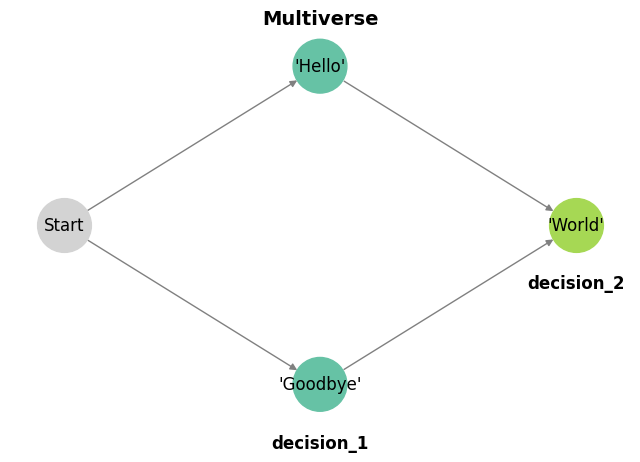

In [3]:
mverse.visualize(label_offset=0.1);

And evaluated:

In [4]:
mverse.run(parallel=2)

Starting multiverse analysis for all universes...


  0%|          | 0/2 [00:00<?, ?it/s]

Hello World
Goodbye World
The multiverse analysis completed without any errors.


For multiverse creation and debugging, two approaches can be applied:

1. You can specify only individual universes for evaluation (or a subset) using e.g. `mverse.run(universe=1)`
2. You can head into the output folder of the multiverse (`<multiverse name>/scripts/`) and open/evaluate individual universe files.

To implement an actual multiverse analysis, you will want to specify a multivere with more diverse forking paths, you generally need to perform the following steps:

1. Input all types of data as the options
2. Save the results of each universe
3. Visualize the results

With Comet, this can be done in the following way:

,Universe,Decision 1,Value 1,Decision 2,Value 2,Decision 3,Value 3,Decision 4,Value 4
0,Universe_1,strings,'Hello',numbers,1.0,tuples,"(1, 2)",functions,type
1,Universe_2,strings,'Hello',numbers,2.0,tuples,"(1, 2)",functions,type
2,Universe_3,strings,'Hello',numbers,3.0,tuples,"(1, 2)",functions,type


Starting multiverse analysis for all universes...


  0%|          | 0/3 [00:00<?, ?it/s]

The multiverse analysis completed without any errors.


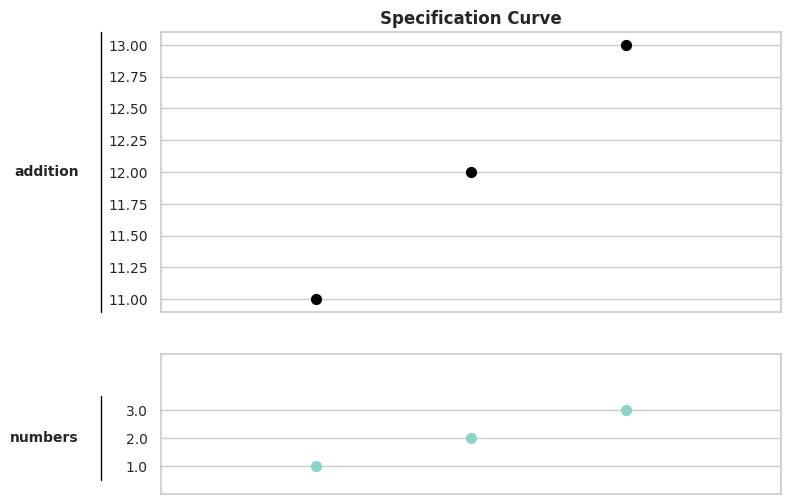

In [5]:
from comet import multiverse

forking_paths = {
    "strings":    ["'Hello'"],
    "numbers":    [1.0, 2.0, 3.0],
    "tuples":     [(1, 2)],
    "functions":  [{"name": "type", "func": "type(x)"}],
}

# Hint: You can add the forking paths to the function parameters to get rid of the squiggly lines in the editor
def analysis_template(strings, numbers, tuples, functions, functions2):    
    import comet # Import comet as we will need it to save the results

    {{strings}}
    {{numbers}}
    {{tuples}}
    
    x = 10 # Define x as it is used by the function
    {{functions}}

    addition = x + {{numbers}}
    comet.utils.save_universe_results({"addition": addition})

mverse = multiverse.Multiverse(name="example_multiverse")
mverse.create(analysis_template, forking_paths)
mverse.summary()

mverse.run(parallel=3)
mverse.specification_curve(measure="addition", line_pad=0.6);

You can also implement more complex multiverse analyses (e.g. with "forbidden" combinations of parameters). We will not cover this today, but you can refer to the [toolbox documentation](https://comet-toolbox.readthedocs.io/en/latest/sections/tutorials.html) if needed.